# Plasma Wakefield Accelerator

In the Plasma Wake Field Accelerator (PWFA) a large amplitude plasma wave is driven by a high energy particle bunch propagating through the plasma.

This scenario can be easily illustrated using a simple 1D ZPIC simulation. Our driver will be a modest ~50 MeV ($u_{fl} = 100 \, \mathrm{c}$) electron beam, with a density $n_b = 0.3 \, n_0$. The driver lenght was chosen to be shorter that half a skin depth.

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d as zpic
import numpy as np

# Time step
dt = 0.09
# Simulation time
tmax = 150.
# Number of cells
nx  = 200
# Simulation box size
box = 20.0

# Particles per cell
ppc = 128

# Use a step density profile
electrons = zpic.Species( "electrons", -1.0, ppc,
                           density = zpic.Density( type = "step", start = 100.0))

driver = zpic.Species( "driver", -1.0, ppc,
                           density = zpic.Density( n = 0.3 , type = "slab", start = 16 , end = 19 ),
                           ufl=[100.0,0.0,0.0])

# Initialize simulation
sim = zpic.Simulation( nx, box, dt, species = [electrons,driver] )

# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( zpic.Smooth(xtype = "compensated", xlevel = 4) )

The initial status of our simulation is:

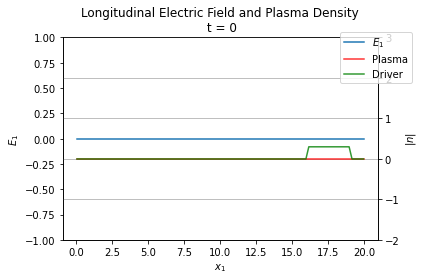

In [2]:
import matplotlib.pyplot as plt

def plot_field_dens( sim ):
    fig, ax1 = plt.subplots()

    xmin = sim.emf.dx/2
    xmax = sim.emf.box - sim.emf.dx/2

    ax1.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex, label = "$E_1$" )
    ax1.set_xlabel("$x_1$")
    ax1.set_ylabel("$E_1$")
    ax1.set_ylim(-1,1)

    ax2 = ax1.twinx()
    #plasma
    ax2.plot(np.linspace(xmin, xmax, num = sim.nx), np.abs(electrons.charge()),'r', label = "Plasma" , alpha = 0.8)
    #driver
    ax2.plot(np.linspace(xmin, xmax, num = sim.nx), np.abs(driver.charge()),'g', label = "Driver" , alpha = 0.8)
    ax2.set_ylabel("|$n$|")
    ax2.set_ylim(-2,3)


    plt.title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim.t))
    plt.grid(True)

    fig.legend(loc = (0.8,0.70))
    fig.tight_layout()

    plt.show()

plot_field_dens( sim )

## Running the simulation

We let the driver beam propagate ove a distance of $\sim 150 \, \mathrm{c}/\omega_p$:

In [3]:
# Run the simulation
sim.run( tmax )


Running simulation up to t = 150 ...
n = 1667, t = 150.03
Done.


## Longitudinal Electric field and Plasma Density

The electron beam drives a high amplitude plasma wave in its wake. Note that the electron beam density is also modulated by the beam-plasma interaction:

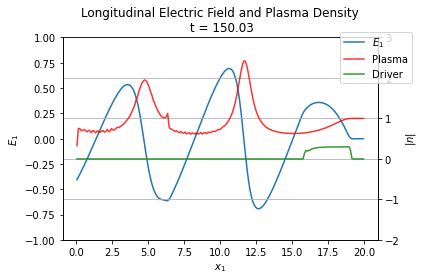

In [4]:
plot_field_dens(sim)

## Driver energy

The electron beam loses kinetic energy, which is transfered to the plasma wave. The head of the beam stays mainly unaffected while the tail of the beam, which in this example will sit close to the peak decelerating field in the first oscillation, loses almost 90% of its energy:

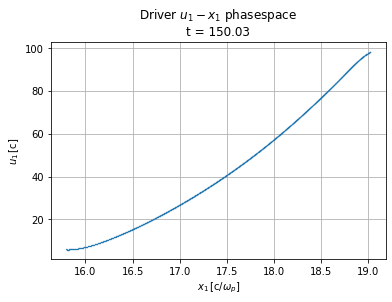

In [5]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx

plt.plot(x(driver),  driver.particles['ux'],  '.', ms = 0.2)
plt.xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
plt.ylabel("$u_1 \, [\mathrm{c}]$")
plt.title("Driver $u_1-x_1$ phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()

## Background plasma phasespace

The plasma wave is strong enough to capture background electrons and accelerate them:

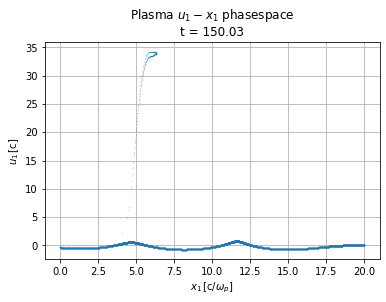

In [6]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx 

plt.plot(x(electrons),  electrons.particles['ux'],  '.', ms = 0.2)
plt.xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
plt.ylabel("$u_1 \, [\mathrm{c}]$")
plt.title("Plasma $u_1-x_1$ phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()